In [26]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
import sklearn.metrics as mtr
import warnings

In [27]:
dataset = pd.read_csv("merged_matches2.csv", sep =";", index_col=0)
dataset['Risultato'] = dataset[['Risultato']].replace(['V','P','N'],[0,1,2])

In [28]:
dataset_without_goals = dataset.drop(columns=['h_team', 'a_team'])

In [29]:
features = [x for x in dataset_without_goals.columns if x != 'Risultato']
X, y = dataset_without_goals[features], dataset_without_goals.Risultato.values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
dt = DecisionTreeClassifier()

In [32]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [33]:
y_pred

array([1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0,
       1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0,
       2, 2, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0,
       0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 0, 1, 0])

In [34]:
warnings.filterwarnings('ignore')

In [35]:
cm = mtr.confusion_matrix(y_test, y_pred)

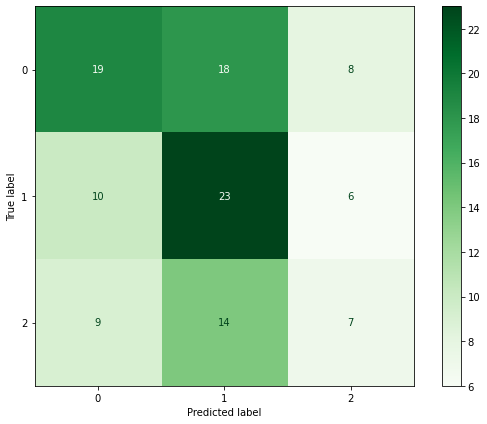

In [36]:
d = mtr.ConfusionMatrixDisplay(cm, [0,1,2])
fig, ax = plt.subplots(figsize=(8,6))
d.plot(ax=ax, cmap='Greens')
plt.tight_layout()
plt.show()

In [37]:
from sklearn.metrics import precision_score, accuracy_score
precision_score(y_test, y_pred, average = None) 
accuracy_score(y_test, y_pred) 
#print('Precision: %.3f' % precision_score(y_test, y_pred))

0.4298245614035088

## Miglioramento modello
Dato che l'accuratezza del modello è molto bassa, devo calcolare 

In [38]:
dataset_normalized = dataset

In [39]:
columns_for_ML = {
    'total_shots_diff': (dataset_normalized['h_total_shots']-dataset_normalized['a_total_shots']),
    'shots_on_target_diff': (dataset_normalized['h_shots_on_target']-dataset_normalized['a_shots_on_target']),
    'corners_diff': (dataset_normalized['h_corners']-dataset_normalized['a_corners']), 
    'fouls_diff': (dataset_normalized['h_fouls']-dataset_normalized['a_fouls']), 
    'yellow_cards_diff': (dataset_normalized['h_yellow_cards']-dataset_normalized['a_yellow_cards']), 
    'red_cards_diff': (dataset_normalized['h_red_cards']-dataset_normalized['a_red_cards']), 
    'risultato': dataset_normalized[['Risultato']].replace(['V','P','N'],[0,1,2])
}

In [40]:
for key, value in columns_for_ML.items():
    dataset_normalized[key] = value

dataset_normalized.head()
#
keys = [k for k in columns_for_ML.keys()]
keys

dataset_normalized = dataset_normalized[keys]

In [41]:
dataset_normalized.head()

,total_shots_diff,shots_on_target_diff,corners_diff,fouls_diff,yellow_cards_diff,red_cards_diff,risultato
0,-4.0,-4.0,3.0,-5.0,1,1,1
0,7.0,4.0,6.0,11.0,-1,0,0
0,14.0,5.0,4.0,3.0,0,0,1
0,10.0,1.0,2.0,5.0,1,0,1
0,1.0,2.0,0.0,-2.0,-2,0,2


In [42]:
features = [x for x in dataset_normalized.columns if x != 'risultato']
X, y = dataset_normalized[features], dataset_normalized.risultato.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

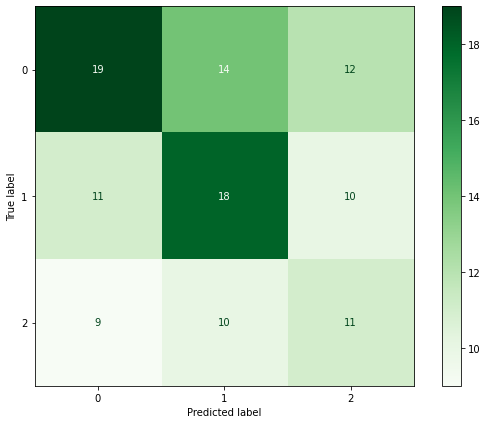

In [43]:
warnings.filterwarnings('ignore')
cm = mtr.confusion_matrix(y_test, y_pred)
d = mtr.ConfusionMatrixDisplay(cm, [0,1,2])
fig, ax = plt.subplots(figsize=(8,6))
d.plot(ax=ax, cmap='Greens')
plt.tight_layout()
plt.show()

In [44]:
from sklearn.metrics import precision_score, accuracy_score
precision_score(y_test, y_pred, average = None) 
accuracy_score(y_test, y_pred) 
#print('Precision: %.3f' % precision_score(y_test, y_pred))

0.42105263157894735